# 4.3 - Dask

![dask](images/dask.png)


$$$$

[Dask](https://dask.org/) es un proyecto de código abierto que permite a los desarrolladores crear su software en coordinación con scikit-learn , pandas y NumPy. Es una herramienta muy versátil que funciona con una amplia gama de cargas de trabajo.

Esta herramienta incluye dos partes importantes; programación dinámica de tareas y recopilación de big data. La parte anterior es muy similar a Luigi , Celery y Airflow , con la excepción de que está optimizada específicamente para cargas de trabajo computacionales interactivas.

La última parte incluye marcos de datos, matrices paralelas y listas extendidas a interfaces populares como pandas y NumPy. De hecho, el Sr. Matthew Rocklin, creador de Dask, confirma que Dask se creó originalmente para paralelizar pandas y NumPy, aunque ahora ofrece muchos más beneficios que un sistema paralelo genérico. Los marcos de datos de Dask son ideales para escalar los flujos de trabajo de pandas y habilitar aplicaciones para series de tiempo. Además, la matriz Dask ofrece análisis de datos multidimensionales para aplicaciones biomédicas, así como algoritmos de aprendizaje automático.

La característica mágica es que esta herramienta requiere cambios mínimos de código y además se ejecuta en clústeres de forma resistente. Además, puede ejecutar este código en paralelo mientras procesa datos, lo que simplemente se traduce en menos tiempo de ejecución, menos tiempo de espera.

El dataframe de Dask comprende marcos de datos de pandas más pequeños, por lo que permite subconjuntos de sintaxis de consulta de pandas. Además es totalmente capaz de programar, construir e incluso optimizar cálculos computacionales complejos en gráficos. Esta es la razón por la que las empresas que operan en cientos de terabytes pueden optar por esta herramienta como opción de acceso.

Dask también le permite crear canalizaciones para matrices de datos, que luego se pueden transferir a los recursos informáticos relevantes. Con todo, esta herramienta es mucho más que una versión paralela de pandas.

$$$$

![dask_process](images/dask_process.png)

$$$$

In [1]:
%pip install "dask[complete]"
%pip install dask_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 2.4 MB/s eta 0:00:00
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached zict-2.2.0-py2.py3-none-any.whl (23 kB)
  Using cached tblib-1.7.0-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 7.4 MB/s eta 0:00:00
  Using cached HeapDict-1.0.1-py3-none-any.whl (3.9 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached dask_ml-2022.5.27-py3-none-any.whl (148 kB)
  Using cached multipledispatch-0.6.0-py3-none-any.whl (11 kB)
  Using cached dask_glm-0.2.0-py2.py3-none-any.whl (12 kB)


Note: you may need to restart the kernel to use updated packages.


**Cargando varios archivos**

In [2]:
import dask
import dask.dataframe as dd

In [3]:
df=dd.read_csv('../data/accounts.*.csv')

df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


### Ejemplo aeropuertos

In [4]:
df=dd.read_csv('../data/nycflights/*.csv')

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [5]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [6]:
df=dd.read_csv('../data/nycflights/*.csv',
               dtype={'TailNum': str, 'CRSElapsedTime': float, 'Cancelled': bool})

df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999,12,31,5,1642.0,1645,1851.0,1901,UA,1753,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [7]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 23 entries, Year to Diverted
dtypes: object(4), bool(1), float64(10), int64(8)
memory usage: 440.9 MB


In [8]:
df.shape

(Delayed('int-d47d3d32-4ffe-49dd-83db-8c01a0262758'), 23)

In [9]:
len(df)

2611892

In [10]:
df.DepDelay.max().compute()

1435.0

In [12]:
%pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


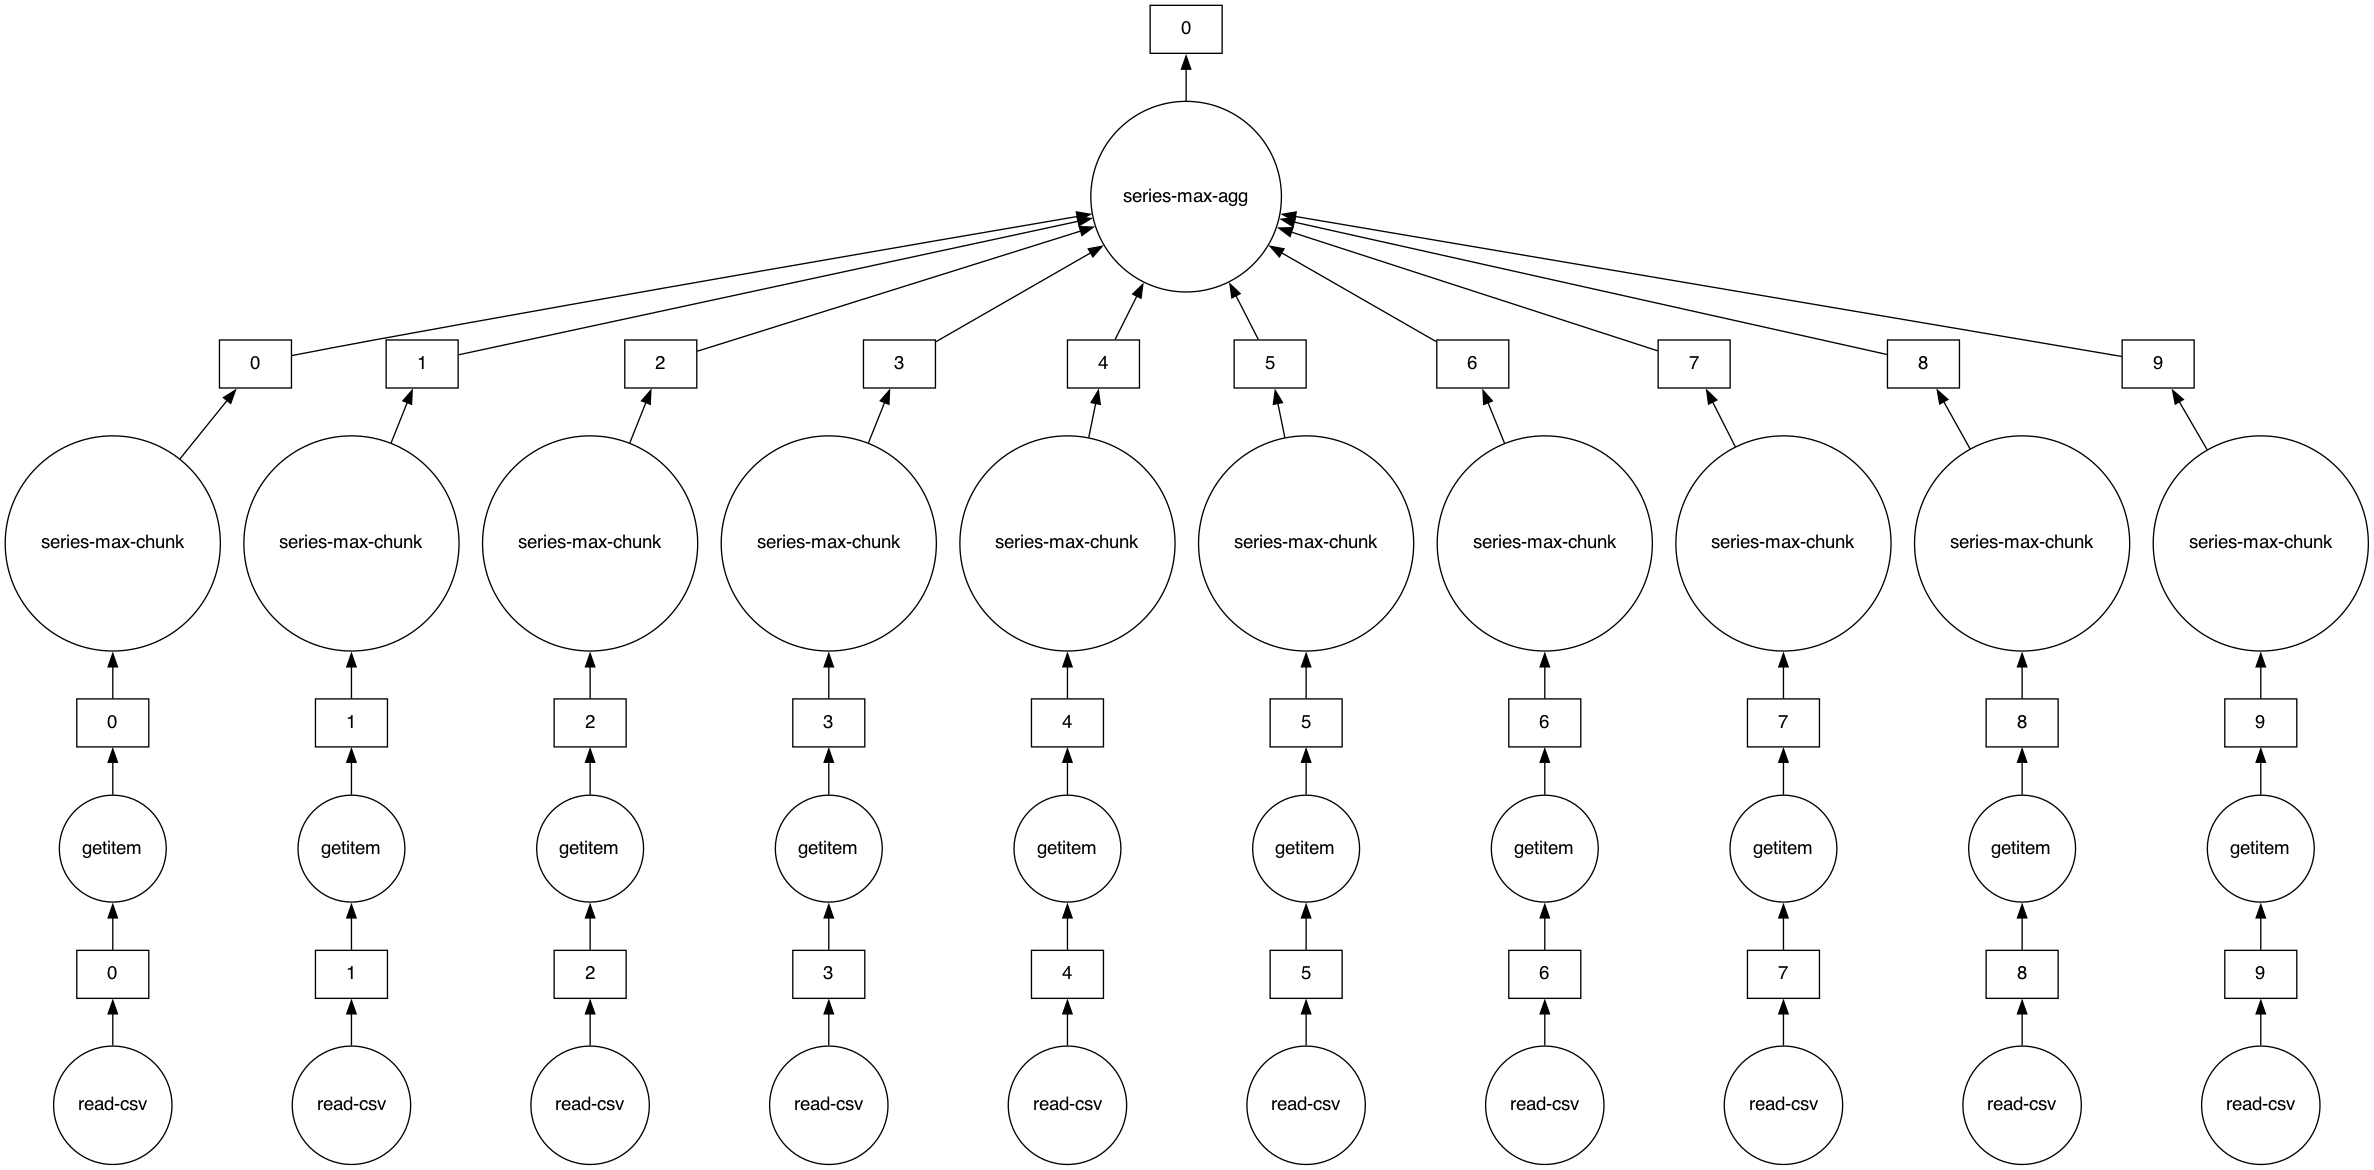

In [13]:
df.DepDelay.max().visualize(filename='images/max_dask.png')

In [14]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [15]:
len(df[~df.Cancelled])   # nº de vuelos NO cancelados

2540961

In [16]:
no_cancelado=df[~df.Cancelled]

media_delay=no_cancelado.DepDelay.mean()

std_delay=no_cancelado.DepDelay.std()

In [17]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [18]:
%time media_delay.compute()

CPU times: user 4.17 s, sys: 503 ms, total: 4.67 s
Wall time: 1.55 s


9.206602541321965

In [19]:
%time std_delay.compute()

CPU times: user 4.15 s, sys: 453 ms, total: 4.61 s
Wall time: 1.51 s


28.974539774551456

In [20]:
%time media_delay_res, std_delay_res=dask.compute(media_delay, std_delay)

CPU times: user 4.27 s, sys: 406 ms, total: 4.67 s
Wall time: 1.55 s


In [21]:
media_delay_res, std_delay_res

(9.206602541321965, 28.974539774551456)

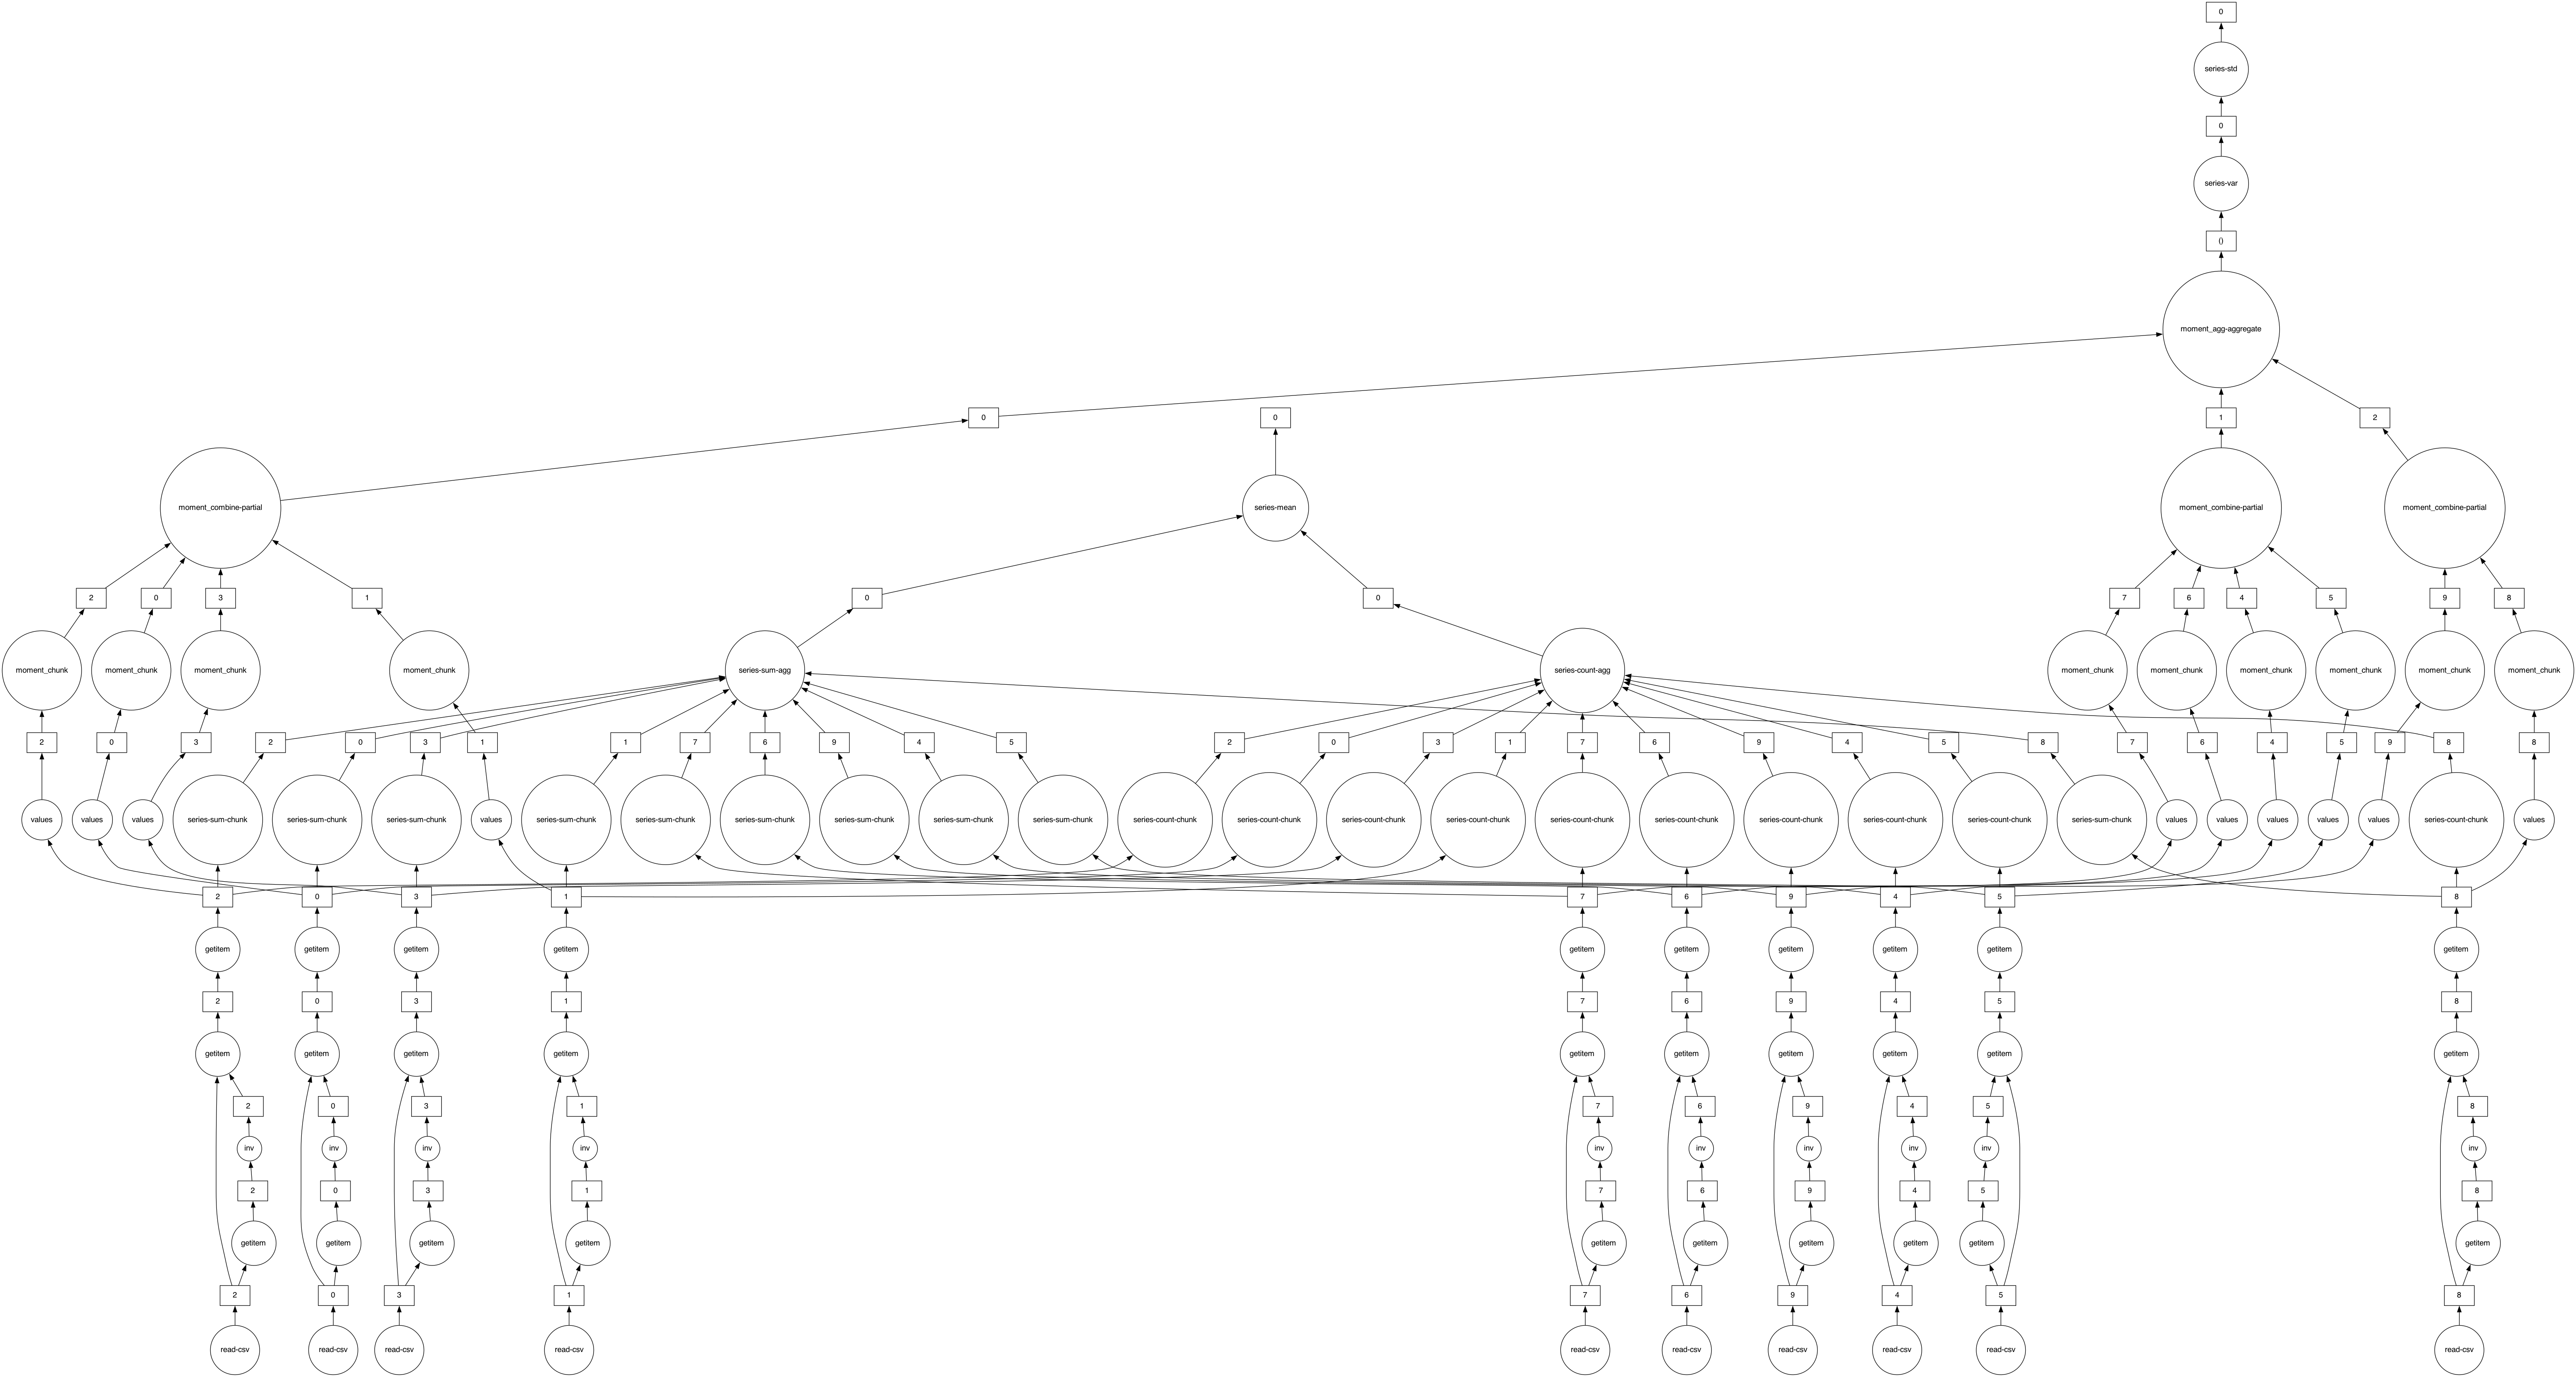

In [22]:
dask.visualize(media_delay, std_delay, filename='images/max_dask.png')

### Tip

El tipo de archivo cambia la forma de procesar y su velocidad. Usaremos archivos `.csv`, `.parquet` y `h5` o `hdfs`

In [23]:
import os

In [24]:
archivos=os.path.join('../data', 'accounts.*.csv')

archivos

'../data/accounts.*.csv'

In [25]:
%time df_csv=dd.read_csv(archivos)

df_csv.head()

CPU times: user 4.32 ms, sys: 3.89 ms, total: 8.21 ms
Wall time: 7.82 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [27]:
%pip install tables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.5 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
target=os.path.join('../data', 'accounts.h5')

%time df_csv.to_hdf(target, key='../data')

CPU times: user 2.62 s, sys: 244 ms, total: 2.87 s
Wall time: 5.8 s


['../data/accounts.h5', '../data/accounts.h5', '../data/accounts.h5']

In [29]:
%time  df_hdf=dd.read_hdf(target, key='../data')

df_hdf.head()

CPU times: user 11 ms, sys: 2.01 ms, total: 13 ms
Wall time: 12.7 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [30]:
df_hdf.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 91.6 MB


In [32]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [33]:
%time df_hdf.amount.sum().compute()

CPU times: user 1.28 s, sys: 90.2 ms, total: 1.37 s
Wall time: 1.37 s


3101435607

In [34]:
%time df_csv.amount.sum().compute()

CPU times: user 289 ms, sys: 54.7 ms, total: 344 ms
Wall time: 124 ms


3101435607

In [35]:
# parquet
%pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.4/777.4 kB 6.8 MB/s eta 0:00:006.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.5 MB/s eta 0:00:0010.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
target=os.path.join('../data', 'accounts.parquet')

df_csv.categorize(columns=['names']).to_parquet(target,
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

In [38]:
%%time 

df_par=dd.read_parquet('../data/accounts.parquet')

df_par.head()

CPU times: user 75.2 ms, sys: 10.3 ms, total: 85.5 ms
Wall time: 84.4 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [39]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [40]:
df_par.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: category(1), int64(2)
memory usage: 71.5 MB


In [41]:
%time df_csv.amount.sum().compute()

CPU times: user 378 ms, sys: 111 ms, total: 489 ms
Wall time: 439 ms


3101435607

In [42]:
%time df_hdf.amount.sum().compute()

CPU times: user 1.28 s, sys: 152 ms, total: 1.43 s
Wall time: 1.54 s


3101435607

In [43]:
%time df_par.amount.sum().compute()

CPU times: user 87.7 ms, sys: 55 ms, total: 143 ms
Wall time: 71.4 ms


3101435607